# 1st Segmentation Prediction Overlay

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [82]:
msk_path = 'C:/Users/sungjoo/Desktop/1st_seg_mask_sample/'

In [86]:
img_path = 'C:/Users/sungjoo/Desktop/1st_seg_result_org_sample/'

In [88]:
label_path = 'C:/Users/sungjoo/Desktop/1st_seg_label/'

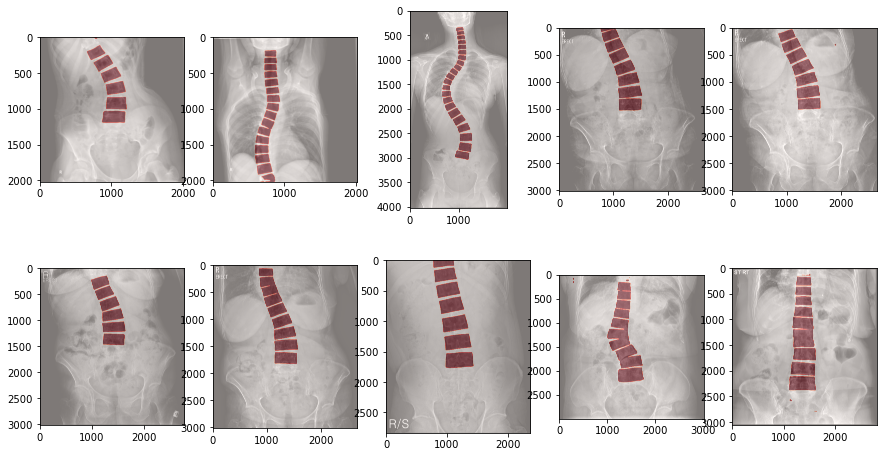

In [87]:
fig = plt.figure(figsize=(15,8))
rows = 2
cols = 5
m=1
    

for i,j in zip(os.listdir(msk_path),os.listdir(img_path)):
    mask = cv2.imread(os.path.join(msk_path,i), 0)
    image = cv2.imread(os.path.join(img_path,j),0)
    
#     img_resized = cv2.resize(image, (512,512))
    
    ax1 = fig.add_subplot(rows, cols, m)
    ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BAYER_BG2GRAY), 'gray')
    ax1.imshow(cv2.cvtColor(mask, cv2.COLOR_BAYER_BG2GRAY),alpha=0.5, cmap='Reds')
    m+=1
    
plt.show()
    
#     plt.imshow(img_resized,'gray')
#     plt.imshow(mask,'gray',alpha=0.3)
#     plt.show()
    
               

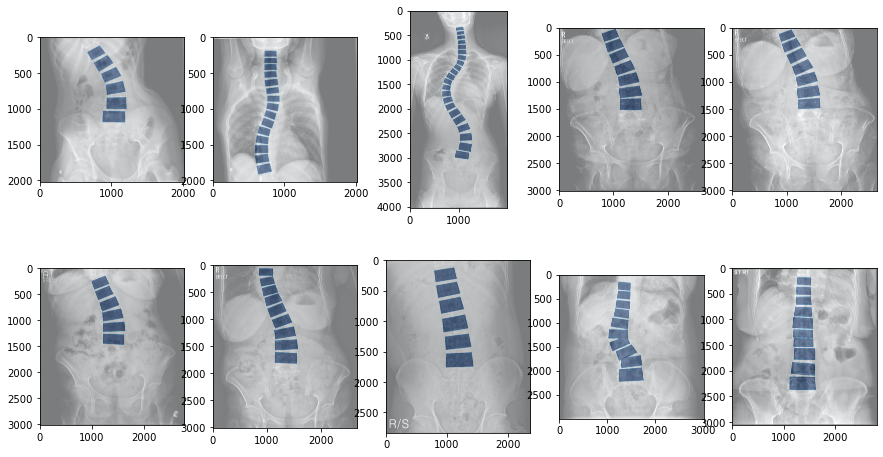

In [89]:
fig = plt.figure(figsize=(15,8))
rows = 2
cols = 5
m=1
    

for i,j in zip(os.listdir(label_path),os.listdir(img_path)):
    label = cv2.imread(os.path.join(label_path,i), 0)
    image = cv2.imread(os.path.join(img_path,j),0)
    
#     img_resized = cv2.resize(image, (512,512))
    
    ax1 = fig.add_subplot(rows, cols, m)
    ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BAYER_BG2GRAY), 'gray')
    ax1.imshow(cv2.cvtColor(label, cv2.COLOR_BAYER_BG2GRAY),alpha=0.5, cmap='Blues')
    m+=1
    
plt.show()

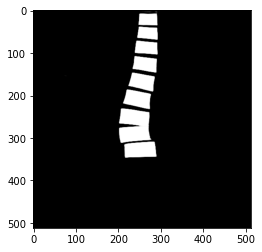

In [24]:
plt.imshow(mask, 'gray')
plt.show()

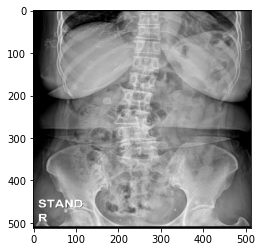

In [14]:
img_resized = cv2.resize(image, (512,512))
plt.imshow(img_resized, 'gray')
plt.show()

In [33]:
mask.min()

62

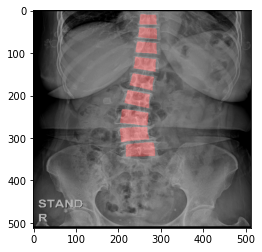

In [45]:
ax = plt.figure()
plt.imshow(np.stack([img_resized] * 3, axis=-1))
_mask = np.zeros_like(mask)
_mask[np.where(mask == 255)] = 255
plt.imshow(np.stack([_mask, np.zeros_like(_mask), np.zeros_like(_mask)], axis=-1), alpha=0.3)
plt.show()
# ax.axis_off()

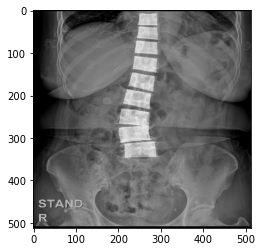

In [25]:
plt.imshow(img_resized, 'gray')
plt.imshow(mask, 'gray', alpha=0.3)
plt.show()

# 2nd Segmentation Prediction Overlay

In [92]:
cropped_img_path = 'C:/Users/sungjoo/Desktop/2nd_org'
cropped_msk_path = 'C:/Users/sungjoo/Desktop/2nd_mask'

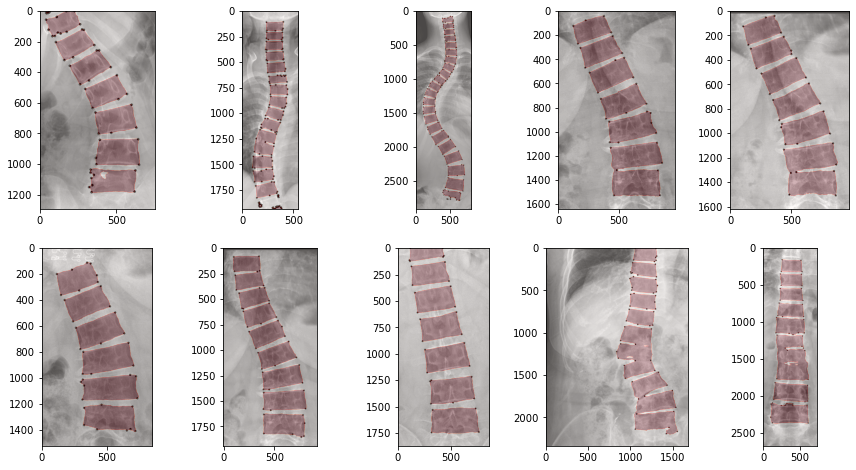

In [95]:
fig = plt.figure(figsize=(15,8))
rows = 2
cols = 5
m=1
    

for i,j in zip(os.listdir(cropped_msk_path),os.listdir(cropped_img_path)):
    mask = cv2.imread(os.path.join(cropped_msk_path,i), 0)
    image = cv2.imread(os.path.join(cropped_img_path,j),0)
    
#     img_resized = cv2.resize(image, (512,512))
    
    ax1 = fig.add_subplot(rows, cols, m)
    ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BAYER_BG2GRAY), 'gray')
    ax1.imshow(cv2.cvtColor(mask, cv2.COLOR_BAYER_BG2GRAY),alpha=0.3, cmap='Reds')
    m+=1
    
plt.show()

In [105]:
cropped_label_path = 'C:/Users/sungjoo/Desktop/2nd_label'

In [106]:
def resizing_image_wh(image, width, height):
    """ Applies image resizing with the size of the given length on an image and returns
    the re-sized image with fixed size.
    Args:
        image (numpy.ndarray): numpy array of the image
        height_and_width (int): length of both height and width to be re-sized
    Returns:
        (numpy.ndarray): numpy representation of re-sized image in size of (height_and_width, height_and_width)
    Example:
        > > > image = cv2.imread('1035642_.svs')
        > > > resizing_image(image, 1024)
        (numpy.ndarray)
    """
    try:
        if not isinstance(image, np.ndarray):
            image = np.asarray(image)
        im = cv2.resize(image, (width, height))
        return im
    except Exception as error:
        raise Exception("Exception occurred while resizing the image: " + str(error))

In [131]:
def extract_corner_points(cnts):
    # print("CNTS[:]: " + str(cnts[:]))
    # cnts = [cnts]
    for candi in cnts[:] :
        print(candi.shape)
    print([cv2.contourArea(candi) for candi in cnts[:]])
    max_cnt = np.max([cv2.contourArea(candi) for candi in cnts[:]])
    print("max_cnt: " + str(max_cnt))

    temp = []
    for candi in cnts[:]:
        if cv2.contourArea(candi) >= max_cnt:
            temp.append(candi)
    cnts = temp

    rc = cv2.minAreaRect(cnts[0])
    box = cv2.boxPoints(rc)
    return box


def make_empty_list_of_spine_properties(rect_list):
    # Properties that needs to be stored in the list
    # Index, Image array, coords, CF_Bool, Compression_ratio
    return [['', '', '', False, 0] for (x, y, w, h) in rect_list if w*h > valid_area_threshold]


def get_corner_points(points):
    tuple_points = []
    for i in range(int(len(points) / 2)):
        tuple_points.append((points[2 * i], points[2 * i + 1]))
    return ''

In [132]:
def sc_snd_mdl_pre_procssing(image):
    resized_image = resizing_image_wh(image, width=256, height=768)
    # resized_image, crop_coords = resizing_image(image, 512)
    normalized_image = cv2.normalize(resized_image, 0, 255, norm_type=cv2.NORM_MINMAX)
    normalized_image = normalized_image * (1./255.)
    return normalized_image

In [133]:
for i in os.listdir(cropped_label_path):
    label= cv2.imread(os.path.join(cropped_label_path,i),0)
    
    prep_img_2 = sc_snd_mdl_pre_procssing(label)
        # cv2.imwrite('/data/hira2020/scoliosis/hyoon/restored_image/' + of[:-4] + '_2nd_prep.png', prep_img_2)
#         print(prep_img_2.shape)
#         sc_2_pred = sc_2_model.predict(prep_img_2.reshape((1, 768, 256, 1))).reshape((768, 256, 1))
    cropped_images = sc_snd_mdl_post_processing(label,  prep_img_2, label.shape)

Contour Length: 1
(6, 4)


error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\shapedescr.cpp:272: error: (-215:Assertion failed) npoints >= 0 && (depth == CV_32F || depth == CV_32S) in function 'cv::contourArea'


In [114]:
def get_roi(original_image, mask_image):
    contour_drawn_img = original_image.copy()
    _, contours = cv2.findContours(mask_image.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    print("Contour Length: " + str(len(contours)))
    # print("Contour shape: " + str(contours.shape))
    box = extract_corner_points(contours)
    print("box: " + str(box))

    point_count = 0
    for cnt in contours:
        approx = cv2.approxPolyDP(cnt, 0.009*cv2.arcLength(cnt, True), True)
        print("Approx DP: " + str(approx))
        print("Approx ravel: " + str(approx.ravel()))
        print("Approx ravel shape: " + str(approx.ravel().shape))
        print("Approx ravel length: " + str(len(approx.ravel())))
        points = approx.ravel()
        for i in range(int(len(points)/2)):
            print("point: " + str(points[i+1]) + ", " + str(points[i]))
            cv2.circle(contour_drawn_img, (points[2*i], points[2*i+1]), radius, color_red, thickness)
            point_count += 1
        print("point count: " + str(point_count))

    rect = [cv2.boundingRect(cnt) for cnt in contours]
    rect.sort(key=get_y_point)
    spine_properties = []
    for i, (x, y, w, h) in enumerate(rect):
        print("Coord " + str(i) + ": " + str((x,y,w,h)))
        print("Area: " + str(w*h))
        if w * h < valid_area_threshold:
            continue

        left, top, right, bottom = x, y, x+w, y+h
        crop_spine = crop(original_image, (left, top, right, bottom), border=50)
        crop_spine = cv2.cvtColor(crop_spine, cv2.COLOR_GRAY2RGB)
        spine_properties.append([i, crop_spine, (left, top, right, bottom), False, 0])
        # print(crop_spine.shape)

        # cv2.imwrite('/data/hira2020/scoliosis/hyoon/cropped_image/'+name[:-4]+'_'+str(i)+'.png', crop_spine)

        # cv2.circle(contour_drawn_img, (x, y), radius, color_red, thickness)
        # cv2.circle(contour_drawn_img, (x+w, y), radius, color_red, thickness)
        # cv2.circle(contour_drawn_img, (x, y+h), radius, color_red, thickness)
        # cv2.circle(contour_drawn_img, (x+w, y+h), radius, color_red, thickness)
#     cv2.imwrite('/data/hira2020/scoliosis/hyoon/cropped_image/' + name[:-4] + '_all_corners.png', contour_drawn_img)

    return spine_properties


def sc_snd_mdl_post_processing(original_image, pred_image, original_shape):
    # RESTORE PRED_IMAGE to ORIGINAL IMAGE SIZE
    pred_image = pred_image * 255

    restored_pred = cv2.resize(pred_image, (original_shape[:2][::-1]))
    # restored_pred = cv2.resize(crop(pred_image, crop_coords), (original_shape[:2][::-1]))

    # cv2.imwrite('/data/hira2020/scoliosis/hyoon/cropped_image/'+name[:-4]+'_pred_msk.png', restored_pred)

    # GET CROPPING POINT as the coordinate of the resized image.
    normalized_image = cv2.normalize(restored_pred, 0, 255, norm_type=cv2.NORM_MINMAX)
    _, pred_mask_binary = cv2.threshold(normalized_image, 128, 255, cv2.THRESH_BINARY)
    # # TODO: actual method needs to be updated after checking with LSJ
    # pred_mask_binary = morphology_operation(pred_mask_binary)
    cropped_spine_properties = get_roi(original_image, pred_mask_binary)
#     cv2.imwrite('/data/hira2020/scoliosis/hyoon/cropped/'+name[:-4]+'_pred_msk.png', pred_mask_binary)

    for index, _, coord, cf_bool, cf_rate in cropped_spine_properties:
        print(index, coord, cf_bool, cf_rate)

    return cropped_spine_properties